<a href="https://colab.research.google.com/github/minoooo119/deeplearning_study/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤩 선형 회귀 구현 (3장)

>해당 내용은 WikiDos: `PyTorch로 시작하는 딥 러닝 입문`을 참고하여 작성하였습니다.  
출처: https://wikidocs.net/53545

선형 회귀를 위해서 필요한 부분들.
아래 내용은 `단순 선형 회귀` 내용이지만 다중 선형 회귀도 같은 방식임을 인지

```python
#1. 변수 선언
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
```

```python
#2. 가중치와 편향의 초기화

# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함. 편향도 똑같이 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
```
위에 1은 차원과 관련해서 알려주고, 뒤 변수는 학습을 통해 값이 변경되는 변수임을 의미합니다.  
```python
#3. 가설 세우기 --> 해당 내용은 nn.Module 사용시 훨신 간편
hypothesis = x_train * W + b #H(x)임 --> forward연산
#4. 비용함수 선언 --> 평균 제곱 오차
cost = torch.mean((hypothesis - y_train) ** 2)
```  
```python
#5. 경사 하강법 구현
optimizer = optim.SGD([W, b], lr=0.01)
#옵티마이저에서 경사하강법으로 사용
#변수 주고 학습률 준다.

# gradient를 0으로 초기화 --> 누적되기때문
optimizer.zero_grad()

# 비용 함수를 미분하여 gradient 계산
cost.backward()

# W와 b를 업데이트
optimizer.step() #계산 결과 반영하여 최적화 단계 진행 해당 단계에서 가중치 편향 수정됨
```  

## ☑️ 파이토치로 구현하기

$H(x)=w_1x_1+w_2x_2+w_3x_3+b$  
처럼 단순 선형 회귀와 다르게 $x$개수가 3개임  
**다중 선형 회귀 (Multivariable Linear Regression)**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
torch.manual_seed(1)

In [ ]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])


이에 대해서 가중치, 절편 초기화


In [ ]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)


가설, 비용 함수, 옵티마이저 선언 후 경사 하강법 1,000회 반복

In [ ]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)
#에포크 1번당 경사 하강법 1회
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad() #gradient 누적되기 때문에 매번 초기화 필요
    cost.backward() #w1,w2,w3,b 기준으로 gradient 계산
    optimizer.step() #이후 learning rate 곱하여 기존 가중치와 절편에서 빼준다.

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))


Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


## ☑️ 벡터와 행렬 연산으로 바꾸기
### 1️⃣ 벡터 연산으로
* 위의 계산에서는 x가 3개 존재해서 직접 가정값 계산 가능
* 1000개 이상이라면 힘들기 때문에 벡터 연산으로 진행
$H(x)=w_1x_1+w_2x_2+w_3x_3$
위 식을 벡터의 내적으로 표현

  $\begin{bmatrix}x_1&x_2&x_3\\ \end{bmatrix}⋅\begin{bmatrix}w_1\\w_2\\w_3\\ \end{bmatrix}=\begin{bmatrix}x_1w_1+x_2w_2+x_3w_3\\ \end{bmatrix} $

  로 표현할 수 있음


### 2️⃣ 행렬 연산으로
* y를 결정 짓는데 있어서 총 샘플이 5개라고 하고 특성이 3개가 있다고 하자 이때 가중치와 계산은 벡터의 연산으로 할 수 없음
* 애초에 5×3 행렬과 3×1 행렬의 곱으로 5×1의 결과 y를 결정하게 된다.  

  $\begin{pmatrix}x_{11}&x_{12}&x_{13}\\x_{21}&x_{22}&x_{23}\\x_{31}&x_{32}&x_{33}\\x_{41}&x_{42}&x_{43}\\x_{51}&x_{52}&x_{53}\\\end{pmatrix}$$\begin{pmatrix}w_{1}\\w_{2}\\w_{3}\\\end{pmatrix}$=$\begin{pmatrix}x_{11}w_1+x_{12}w_2+x_{13}w_3\\x_{21}w_1+x_{22}w_2+x_{23}w_3\\x_{31}w_1+x_{32}w_2+x_{33}w_3\\x_{41}w_1+x_{42}w_2+x_{43}w_3\\x_{51}w_1+x_{52}w_2+x_{53}w_3\\ \end{pmatrix}$

  

  * 행렬이용해서 다중 선형 회귀 계산 진행 ⬇️

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])
#특성 3개 5개의 샘플 5*3

In [ ]:
print(x_train.shape)
print(y_train.shape)


torch.Size([5, 3])
torch.Size([5, 1])


In [ ]:
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
#가중치는 3*1 벡터임 --> 각 특성에 대해서 가중치가 필요한 거니까 특성 수와 같아야함

In [ ]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b
    #가중치와 곱해줌
    #위 부분이 행렬을 이용해서 개선된 부분

    # cost 계산
    #가설과 실제 값의 편차 제곱의 평균
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch%100==0:
      print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
          epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
      ))

Epoch    0/1000 hypothesis: tensor([152.6685, 184.5856, 179.4857, 196.1604, 142.2285]) Cost: 0.192199
Epoch  100/1000 hypothesis: tensor([152.6628, 184.5864, 179.4926, 196.1545, 142.2333]) Cost: 0.189211
Epoch  200/1000 hypothesis: tensor([152.6572, 184.5872, 179.4994, 196.1487, 142.2380]) Cost: 0.186330
Epoch  300/1000 hypothesis: tensor([152.6517, 184.5880, 179.5060, 196.1430, 142.2426]) Cost: 0.183563
Epoch  400/1000 hypothesis: tensor([152.6464, 184.5889, 179.5125, 196.1374, 142.2472]) Cost: 0.180887
Epoch  500/1000 hypothesis: tensor([152.6411, 184.5897, 179.5189, 196.1319, 142.2517]) Cost: 0.178310
Epoch  600/1000 hypothesis: tensor([152.6359, 184.5905, 179.5251, 196.1266, 142.2561]) Cost: 0.175835
Epoch  700/1000 hypothesis: tensor([152.6308, 184.5913, 179.5312, 196.1213, 142.2605]) Cost: 0.173442
Epoch  800/1000 hypothesis: tensor([152.6257, 184.5921, 179.5372, 196.1161, 142.2647]) Cost: 0.171142
Epoch  900/1000 hypothesis: tensor([152.6208, 184.5928, 179.5430, 196.1110, 142.26

## ☑️ nn.Module로 구현하는 선형회귀
>지금까지는 선형회귀의 직접적인 이해를 위해 `가설`, `비용함수`를 직접 정의해서 선형 회귀 모델 구현했음.

> 이제부터 이미 구현되어 있는 함수로 더 쉽게 선형 회귀 모델 구현.

```python
import torch.nn as nn
model=nn.Linear(input_dim,output_dim)
import torch.nn.functional as F
cost=F.mse_loss(prediction,y_train)
```

### 🟡 단순 선형 회귀

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
torch.manual_seed(1)

데이터 선언 --> 이미 값 알고 있는 데이터로 진행

In [5]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
#해당 선형 식이 y=2x임을 알고 있음

In [6]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)
#입력의 차원과 출력의 차원을 인수로 받음
#현재 입력 차원 1차원, 출력 차원 1차원임 -> 하나의 x에 대해서 하나의 y 값을 가지기 때문

해당 모델에는 가중치 W와 편향 b가 저장되어있음
model.parameters()함수로 확인 가능

In [7]:
print(list(model.parameters()))
#출력 순서대로 W와 b에 해당한다.
#처음에는 랜덤으로 초기화가 되어져 있다.

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [8]:
#옵티 마이저 정의
#W, b 전달 후 학습률도 정함

# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

학습 시작

In [9]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train) #전과 다르게 이제는 이렇게 가정값(예측값) 구한다

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산 --> model parameter인 W.b에 대해서 gradient 구함
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


학습 완료 --> Cost 값이 매우 작은 것을 확인할 수 있음
와 b가 최적화 되었는지 확인해보자

값을 넣어서 예측값이 맞는지 확인, 학습 후 W와 b값도 확인

In [10]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]])
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y)
print(list(model.parameters()))

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


해당 결과가 잘 나옴을 확인 --> W의 값이 2에 가깝고 b가 0에 가까우므로 잘 학습이 된 것을 확인할 수 있다.

### 🟡 다중 선형 회귀 구현
>사용했던 함수를 이용하여 다중 선형 회귀를 구현해보자

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [12]:
torch.manual_seed(1)


이번에는 샘플이 가지는 특성이 3개가 존재한다. 즉, input 차원은 3차원이 된다. output은 여전히 y 하나이므로 1이다.
> 인풋 수, 아웃풋 수 ==> 샘플 당 특성 수, 결과 특성 수

In [13]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [14]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

In [15]:
print(list(model.parameters()))
#가중치 3개 랜덤 값과, 편향 b의 랜덤값을 가지고 있다

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [16]:
#계속 진행한 것 처럼 옵티마이저 정의
#단, 이번엔 Learing Rate 조금 더 작게 줌 --> 발산 방지
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
#이렇게 진행시 발산해서 안됨
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

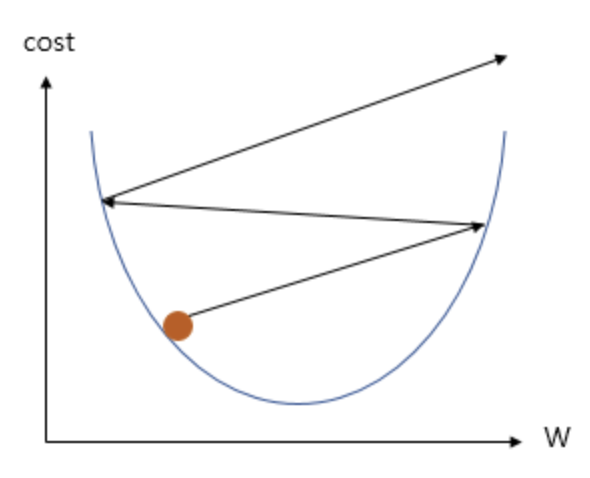

In [17]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


매우 낮은 cost 확인 가능

이에 대해 다른 샘플에 대해서 예측값 test

In [18]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]])
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)
#훈련된 가중치와 편향 출력
print(list(model.parameters()))

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2305]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


## ☑️ 클래스로 파이토치 모델 구현  
---
* 모델을 클래스로 구현하자
* 앞서서 단순 선형 회귀 모델은 아래와 같이 구현함
  ```python
  model=nn.Linear(1,1)
  ```
  이를 클래스로 구현해보자  

### 1️⃣ 모델 구현

단순 선형 회귀 모델

In [19]:
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): #
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단순 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [20]:
model = LinearRegressionModel()

>클래스 형태의 모델은 nn.Module을 상속받는다.  
그리고 \_\_init\_\_()에서 모델의 구조와 동작을 정의하는 생성자를 정의.  
객체 생성시 자동 호출됨  
`super()` 함수를 부르면 nn.Module 클래스의 속성들을 가지고 초기화  
`forward()` 함수는 학습 데이터를 입력받아서 forward 연산 진행
* ex) model 이름의 객체일 경우 --> model(입력 데이터) 형식으로 호출시 자동으로 forward 수행

* forward 연산 ==> $H(x)$에 입력값 $x$를 주고 예측값 $y$를 얻는 것을 말함


다중 선형 회귀 모델 class 정의

In [21]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [ ]:
#전에는 model=nn.Module(3,1) 이런식으로 구현했었음
model = MultivariateLinearRegressionModel()

### 2️⃣ 단순 선형 회귀 클래스로

모델을 클래스로 구현

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F


torch.manual_seed(1)


# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
#훈련 데이터로 현재 단순 선형이므로 샘플 당 특성이 1개 즉, 가중치가 1개 필요

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) #1,1 --> 입력 1차원, 출력 1차원

    def forward(self, x):
        return self.linear(x)
model = LinearRegressionModel()
#model --> 선형 회귀 모델 객체됨

# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
#optimizer 역할: 최적화 알고리즘을 통해 적절하게 W, b를 찾아내기 위해서 존재, 방법은 SGD(slopy gradient descent) 사용

#경사 하강법: 위에 해당 parameter에는 W(가중치), b(편향) 존재, 두 변수를 기준으로 MSE(평균 제곱 오차)의 변화율을 구하고
#해당 변화율에 lr=학습률 을 곱해서 최소값이 되는 W와 b를 구해내는 방법

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train) #예측값에 해당함

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    #--> cost를 parameter에 대해서 미분하고 값 해당 .grad에 누적되기때문에 초기화 해주는 것임

    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


### 3️⃣ 다중 선형 회귀 모델 클래스로

단순 선형 회귀 모델과 다른 부분은 훈련 데이터와 가중치의 차원만 다름

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769
